In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Just some matplotlib tweaks
import matplotlib as mpl

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
rc("axes", labelsize = "large")
def cm2inch(value):
    return value/2.54

In [3]:
z = np.linspace(10e-9, 2e-6, 10000)
a = 1.5e-6
D0 = 4e-21 / (6*np.pi * 0.001 * a)
#taking alpha  = 1
v_noise = 2*D0 * a * (2*a**2 + 12 *a * z + 21 * z** 2) / (2*a**2 + 9*a*z + z**2)**2


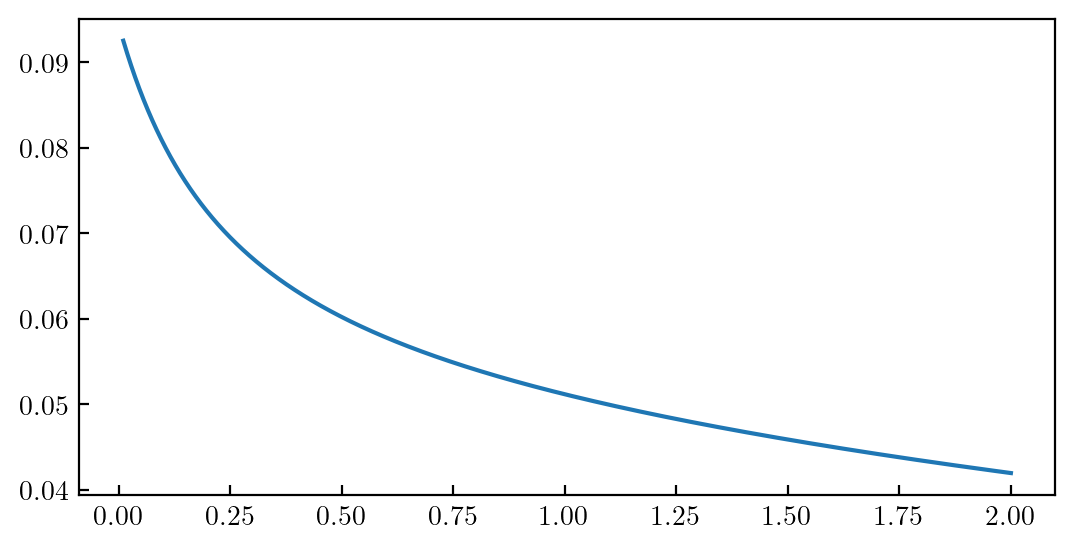

In [4]:
plt.figure(figsize=( cm2inch(16),cm2inch(8)))
plt.plot(z*1e6, v_noise*1e6)

In [5]:
def eta_z(z):
    return 0.001 * (6*z**2 + 9 * a * z + 2 * a**2)/(6*z**2 + 2*a*z)

def gamma(z):
    return 6 * np.pi * eta_z(z) * a

lb = 500e-9
ld = 50e-9
B = 4 #kt unit
def F_z(z):
    return - 4e-21 * (-1/ld * B *np.exp(-z/ld)  + 1/lb)

In [6]:
v_deterministic = 1/gamma(z) * F_z(z)

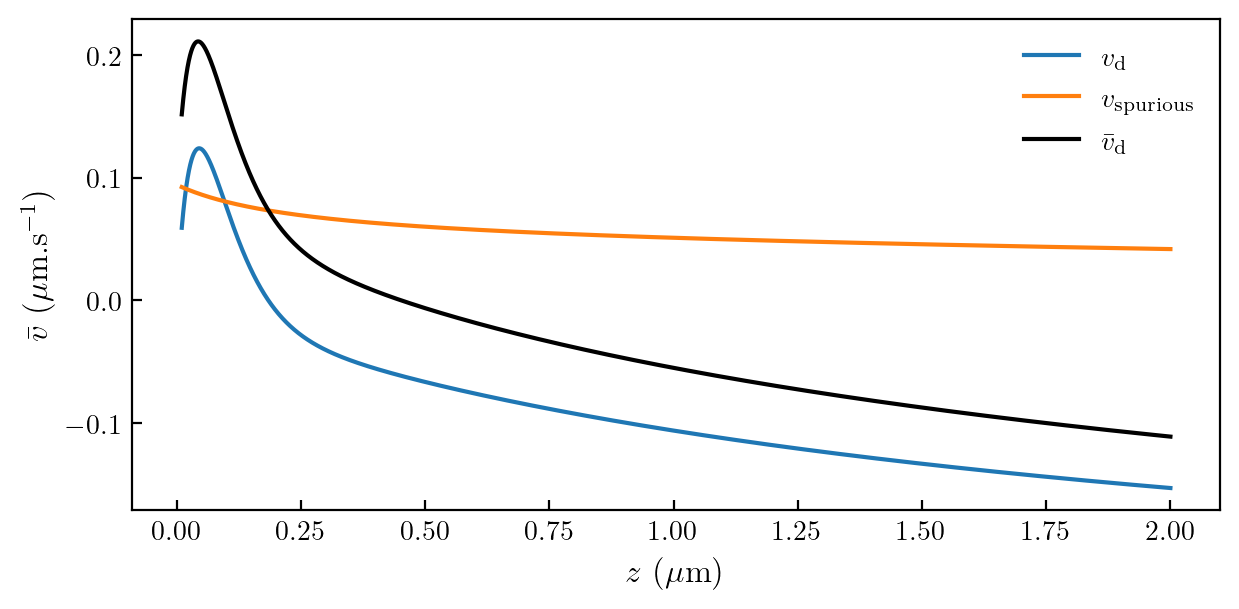

In [7]:
plt.figure(figsize=( cm2inch(16),cm2inch(8)))
plt.plot(z*1e6, v_deterministic*1e6, label = "$v_\mathrm{d}$")
plt.plot(z*1e6, v_noise*1e6, label="$v_\mathrm{spurious}$")
plt.plot(z*1e6, v_noise*1e6 + v_deterministic*1e6, color = "black", label = "$\\bar{v}_\mathrm{d}$")
plt.ylabel("$\\bar{v}$ ($\\mathrm{\\mu m.s^{-1}}$)")
plt.xlabel("$z$ ($\\mathrm{\\mu m}$)")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("spurious.pdf")